In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
#reading the data
df = pd.read_excel('D:/IDA/HW2Data.xlsx',header=None)

In [3]:
#70% train data and 30% test data
from sklearn.model_selection import train_test_split 
train_data,test_data = train_test_split(df,train_size = 0.7)
train_label=train_data[3]
train_data=train_data.drop([df.columns[3],df.columns[2]], axis=1)
test_label=test_data[3]
test_data=test_data.drop([df.columns[3],df.columns[2]], axis=1)

In [4]:
#svc with rbf kernel with different regularization parameters
v=[0.1,0.5,1,10,50,100]
cl=[]
for a in v:
    clf=SVC(kernel='rbf',C=a,gamma='auto')
    model=clf.fit(train_data,train_label)
    cl.append(model)

In [5]:
#accuracy for different reference parameters
accuracy=[]
for clf in cl:
    predict_label=clf.predict(test_data)
    accc=accuracy_score(test_label,predict_label)*100
    accuracy.append(accc)

Text(0.5, 1.0, 'ACCURACY')

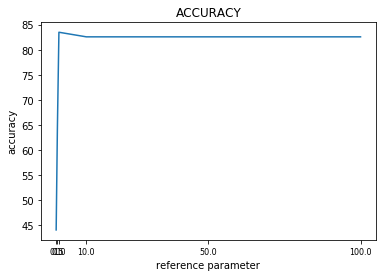

In [20]:
#Accuracy plot
plt.xlabel("reference parameter")
plt.ylabel("accuracy")
plt.xticks(v)
plt.tick_params(axis='x', which='major', labelsize=8)
plt.plot(v,accuracy)
plt.title("ACCURACY")

- Accuracy values are almost similar to values for 1 and above 1 for the 6 values<br>
- There is not  a significant change in accuracy for c=1,10,100<br>
- model performed poor for values c=0 and c=0.75<br>
- we can choose 1 as ideal c parameter as the accuracy is high.

In [19]:
# recall and precision for two classes
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
r_normal = []
r_abnormal=[]
p_normal=[]
p_abnormal=[]
for clf in cl:
        predict_label=clf.predict(test_data)
        r_normal.append(recall_score(test_label,predict_label,pos_label=1))
        r_abnormal.append(recall_score(test_label,predict_label,pos_label=2))
        p_normal.append(precision_score(test_label,predict_label,pos_label = 1))
        p_abnormal.append(precision_score(test_label,predict_label,pos_label = 2)) 

C:\Users\vishwateja\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion=[]
for clf in cl:
    predict_label=clf.predict(test_data)
    c=confusion_matrix(test_label,predict_label).ravel()
    confusion.append(c)

In [9]:
#Question 1.a
for i in range(len(v)):
    print("REFERENCE PARAMETER: {}".format(v[i]))
    print("\tAccuracy: {}".format(accuracy[i]))
    print("\tCLASS1: prec {} RECALL {} ".format(p_normal[i],r_normal[i]))
    print("\tCLASS2: precision {} recall {} ".format(p_abnormal[i],r_abnormal[i]))
    print("\tconfusion matrix: tn,fp,fn,tp= {}".format(confusion[i]))

REFERENCE PARAMETER: 0.1
	Accuracy: 44.03669724770643
	CLASS1: prec 0.0 RECALL 0.0 
	CLASS2: precision 0.44036697247706424 recall 1.0 
	confusion matrix: tn,fp,fn,tp= [ 0 61  0 48]
REFERENCE PARAMETER: 0.5
	Accuracy: 64.22018348623854
	CLASS1: prec 0.9583333333333334 RECALL 0.3770491803278688 
	CLASS2: precision 0.5529411764705883 recall 0.9791666666666666 
	confusion matrix: tn,fp,fn,tp= [23 38  1 47]
REFERENCE PARAMETER: 1
	Accuracy: 83.4862385321101
	CLASS1: prec 0.8115942028985508 RECALL 0.9180327868852459 
	CLASS2: precision 0.875 recall 0.7291666666666666 
	confusion matrix: tn,fp,fn,tp= [56  5 13 35]
REFERENCE PARAMETER: 10
	Accuracy: 82.56880733944955
	CLASS1: prec 0.8 RECALL 0.9180327868852459 
	CLASS2: precision 0.8717948717948718 recall 0.7083333333333334 
	confusion matrix: tn,fp,fn,tp= [56  5 14 34]
REFERENCE PARAMETER: 50
	Accuracy: 82.56880733944955
	CLASS1: prec 0.8 RECALL 0.9180327868852459 
	CLASS2: precision 0.8717948717948718 recall 0.7083333333333334 
	confusion ma

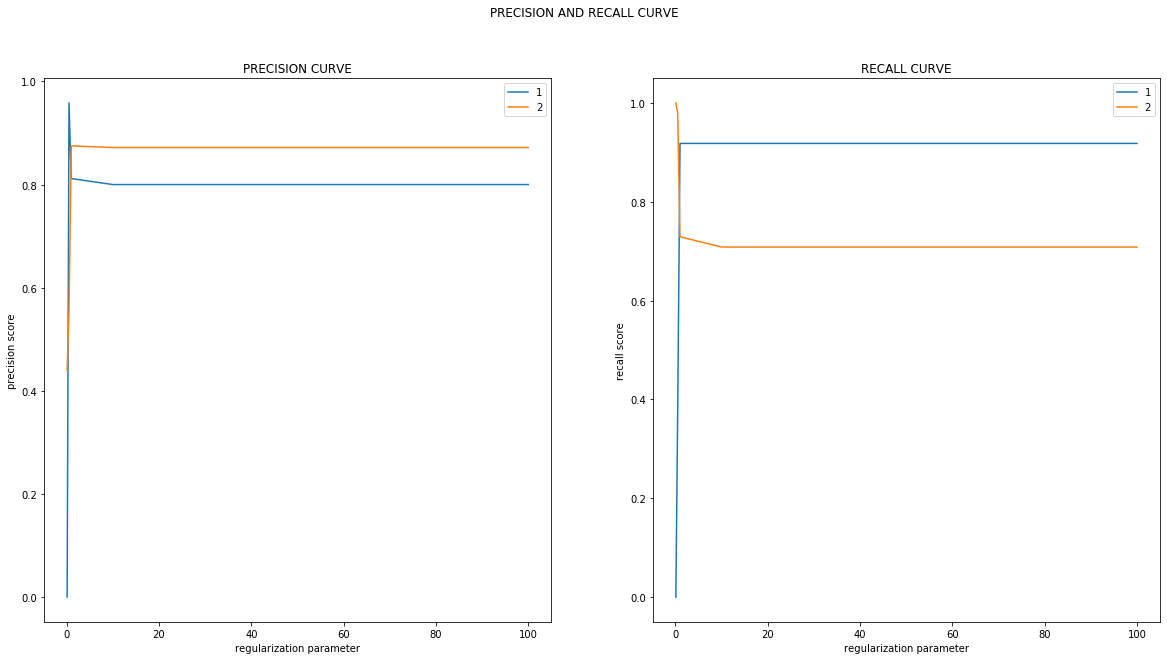

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(v,p_normal,label="1")
plt.plot(v,p_abnormal,label="2")
plt.xlabel("regularization parameter")
plt.ylabel("precision score")
plt.legend()
plt.title("PRECISION CURVE")
plt.subplot(1,2,2)
plt.plot(v,r_normal,label="1")
plt.plot(v,r_abnormal,label="2")
plt.xlabel("regularization parameter")
plt.ylabel("recall score")
plt.legend()
plt.title("RECALL CURVE")
plt.suptitle("PRECISION AND RECALL CURVE")
plt.show()

- For parameter 0.5 has highest precision value of 0.93 and lowest for 0.1 with 0 for class 1 <br>
- For class 2 the highest precsion is 0.87 for values c=10,50 and 100 and lowest is for 0 
- For both the class precision value maintained a good number for c>= 1
- Recall foolowing similar trend as precision,lowest is for 0.1(0) and increased for other values for class 1 following similar trend in class 2


In [11]:
# 1.b) maximum accuracy model index
i=accuracy.index(max(accuracy))
print("maximun accuracy model is:{}".format(max(accuracy)))

maximun accuracy model is:83.4862385321101


In [12]:
max_clf=cl[i]

In [13]:
grid=[ [x, y] for x in range(1,101) for y in range(1,101)]
grid_data = pd.DataFrame(grid, columns = ['0', '1'])

In [14]:
predict_grid=max_clf.predict(grid_data)
grid_data[2]=predict_grid

In [15]:
g=grid_data.groupby(grid_data.columns[2])
pos=g.get_group(1)
neg=g.get_group(2)
pos_label=pos[2]
neg_label=neg[2]
pos=pos.drop(grid_data.columns[2],axis=1)
neg=neg.drop(grid_data.columns[2],axis=1)

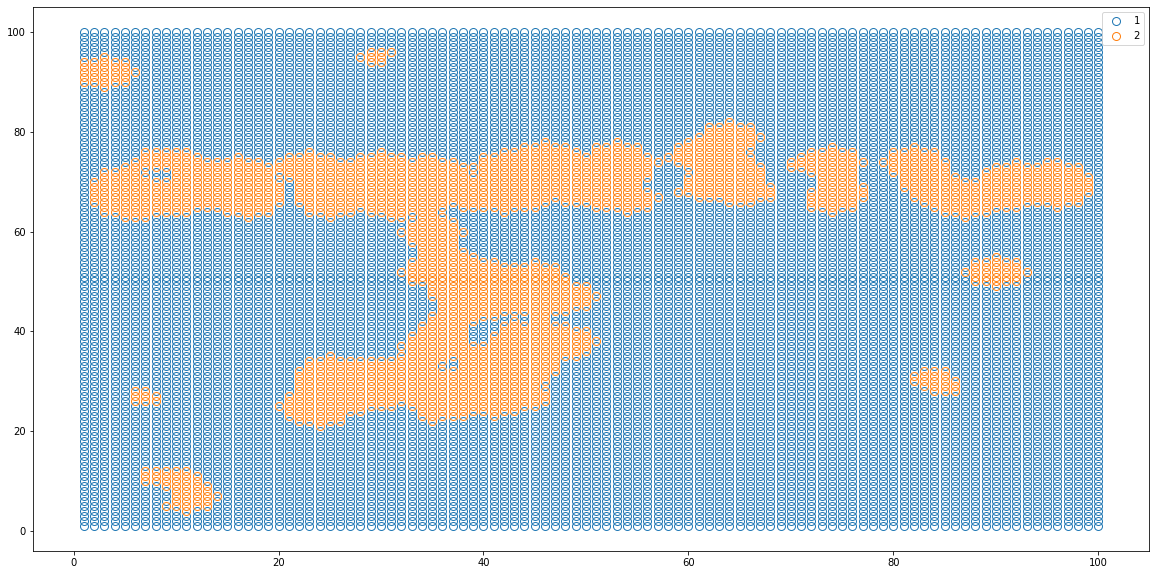

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
ax.margins(0.05)
ax.plot(pos['0'], pos['1'], marker='o', linestyle='', ms=8, mfc='none', label=1)
ax.plot(neg['0'], neg['1'], marker='o', linestyle='', ms=8, mfc='none', label=2)
ax.legend()

plt.show()

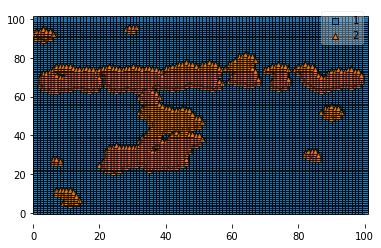

In [21]:
from mlxtend.plotting import plot_decision_regions
X=np.asarray(grid)
plot_decision_regions(X,predict_grid,max_clf)

Decision boundaries for data grid for reference to the answer 2.a

i.	How efficient and effective are these boundaries, given data distribution of the two classes.<br>
  Comment: Effectiveness of the decision boundary depends on the kernel parameter,c parameter and svm.The above boundaries by SVM are not effective due to the small groups of class present in many of the places.Those may be outliers.May be changing kernel parameter leads to effective and efficient model than this.

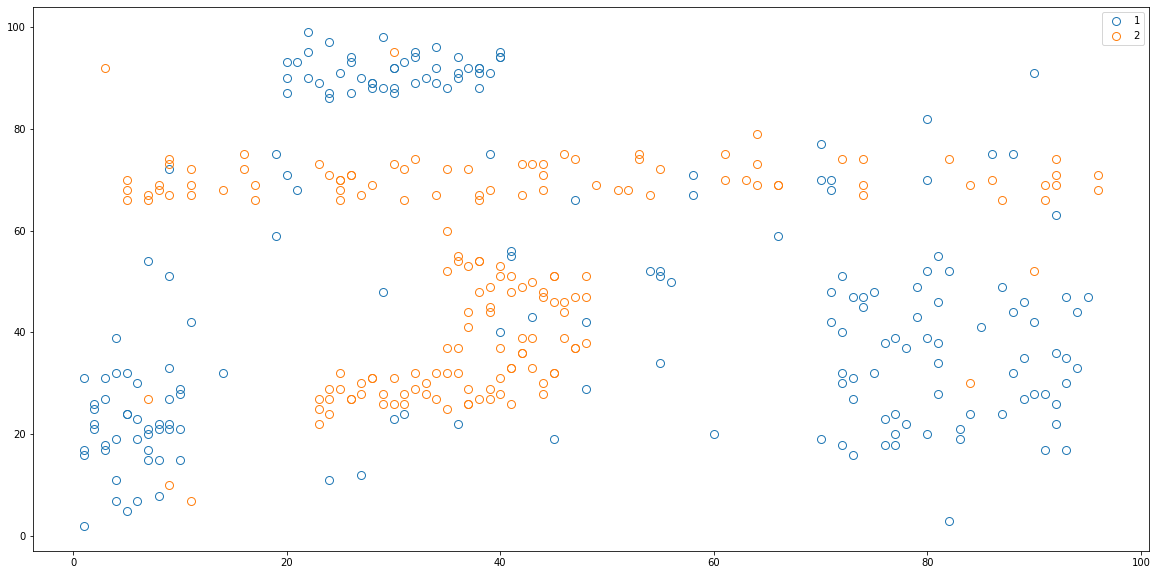

In [18]:
final_data=df.drop([df.columns[2],df.columns[3]],axis=1) 
predict=max_clf.predict(final_data)
predict.tolist() 
final_data[2]=predict
g=final_data.groupby(final_data.columns[2]) 
pos=g.get_group(1) 
neg=g.get_group(2) 
pos_label=pos[2] 
neg_label=neg[2] 
pos=pos.drop(final_data.columns[2],axis=1) 
neg=neg.drop(final_data.columns[2],axis=1)
fig, ax = plt.subplots(figsize=(20,10)) 
ax.margins(0.05) 
ax.plot(pos[0], pos[1], marker='o', linestyle='', ms=8, mfc='none', label=1) 
ax.plot(neg[0], neg[1], marker='o', linestyle='', ms=8, mfc='none', label=2) 
ax.legend()
plt.show()

ii.	On a plot of original data points draw the ideal boundaries that you would like to see from your intuitive point of view.    Give reason for your choosing the boundaries that you have drawn.<br>
    The boundaries I drawn above are of no complex type and ignoring the outliers and classifying them according to data distribution data.generalization error may be less for the above boundary.

iii.	Which classifier, in your view, can learn the boundaries closest to the intuitive ones you have suggested? Give reasons for your answer.<br>
    In my view I use Svm classifier with rbf as kernel same as used in the problem But i keep on changing the kernel parameter and regularization parameter until my training loss and testinng less is less.changing kernel parameter changes the decision boundaries so we may keep on trying with different gamma values until we have our ideal decision boundary.

d.	What is the role of the regularization parameter and how does it work? (Maximum 200 words)<br>
    values of regularization parameter(c) and kernel parameter (gamma) decides the performance of svm model.<br>
    we can say c value as cost of mis classification.if c value is low , decision boundary classified points with high bias and low variance leads to under fitiing.if c value is high that is low bias and over fitting trainning error is less leads to over fitting.<br>so we must choose appropriate c value that performs well on real data that is generalization error is less.<br>choose the appropriate value thet the model is not too loose or too strict<br>Best way we can choose (c,gamma) value pair through grid search according to their performances